In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mglearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

In [2]:
# import data and view dataset
train_df = pd.read_csv('train.csv')
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [3]:
# view total number of rows and columns
train_df.shape

(3000888, 6)

There are 3000888 rows and 6 columns

In [4]:
# view individual column names
train_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [5]:
# view the data types present
train_df.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [6]:
# view information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
# View null values
train_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

There are no null values in the data set

# Univariate Analysis

### ID column

In [8]:
# view unique values in the ID column
train_df['id'].value_counts()

0          1
2000584    1
2000586    1
2000587    1
2000588    1
          ..
1000298    1
1000299    1
1000300    1
1000301    1
3000887    1
Name: id, Length: 3000888, dtype: int64

Every customer has a unique id number

### Date column

In [9]:
# view number of times each date appears
train_df['date'].value_counts()

2013-01-01    1782
2016-01-15    1782
2016-02-08    1782
2016-02-07    1782
2016-02-06    1782
              ... 
2014-07-13    1782
2014-07-12    1782
2014-07-11    1782
2014-07-10    1782
2017-08-15    1782
Name: date, Length: 1684, dtype: int64

Each date appears the 1782 times

### Store number column

In [10]:
# View the store number column
train_df['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

The individual store numbers are shown above

### Family 

In [11]:
# View the family column
train_df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

The individial families are shown in the family column are shown above

### Sales

In [12]:
# view the sales column
train_df['sales']

0             0.000
1             0.000
2             0.000
3             0.000
4             0.000
             ...   
3000883     438.133
3000884     154.553
3000885    2419.729
3000886     121.000
3000887      16.000
Name: sales, Length: 3000888, dtype: float64

In [13]:
max_sales_value = train_df['sales'].max()
min_sales_value = train_df['sales'].min()

print('The maximum sales value is: ' + str(max_sales_value))
print('The minimum sales value is: ' + str(min_sales_value))

The maximum sales value is: 124717.0
The minimum sales value is: 0.0


### onpromotion column

In [14]:
# view onpromotion column
train_df['onpromotion'].value_counts()

0      2389559
1       174551
2        79386
3        45862
4        31659
        ...   
313          1
452          1
642          1
305          1
425          1
Name: onpromotion, Length: 362, dtype: int64

The most onpromotion value is 0

#  The holidays dataset

In [15]:
# Import the holidays dataset
holidays_df = pd.read_csv('holidays_events.csv')
holidays_df

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [16]:
# check for null values in the holidays dataset
holidays_df.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

There are no null values in the holidays dataset

### The date column

In [17]:
holidays_df['date'].value_counts()

2014-06-25    4
2017-06-25    3
2016-06-25    3
2015-06-25    3
2013-06-25    3
             ..
2014-07-13    1
2014-07-12    1
2014-07-09    1
2014-07-08    1
2017-12-26    1
Name: date, Length: 312, dtype: int64

In [18]:
# viewing only datasets that fall on 25th June, 2014
holidays_df[holidays_df['date'] == '2014-06-25']

,date,type,locale,locale_name,description,transferred
110,2014-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
111,2014-06-25,Holiday,Local,Machala,Fundacion de Machala,False
112,2014-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
113,2014-06-25,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Francia,False


25th June, 2014 appears the most. This means that, more events(4) took place on that date.

### Type column

In [19]:
# viewing the number of counts of elements in the 'Type' column
holidays_df['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

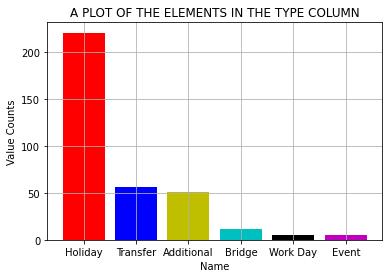

In [20]:
# plot the type column
plt.bar(holidays_df['type'].unique(), holidays_df['type'].value_counts(), color=['r', 'b', 'y', 'c', 'k', 'm'])
plt.title('A PLOT OF THE ELEMENTS IN THE TYPE COLUMN')
plt.xlabel('Name')
plt.ylabel('Value Counts')
plt.grid()
plt.show()

Holiday appears the most

### Locale column

In [21]:
# viewing the number of counts of elements in the 'Locale' column
holidays_df['locale'].value_counts()

National    174
Local       152
Regional     24
Name: locale, dtype: int64

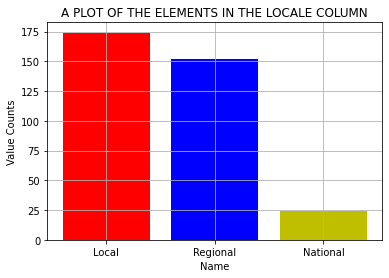

In [22]:
# plot the locale column
plt.bar(holidays_df['locale'].unique(), holidays_df['locale'].value_counts(), color=['r', 'b', 'y'])
plt.title('A PLOT OF THE ELEMENTS IN THE LOCALE COLUMN')
plt.xlabel('Name')
plt.ylabel('Value Counts')
plt.grid()
plt.show()

The plot above shows that, local appears the most in the dataset

### Locale Name Column

In [23]:
# viewing the number of counts of elements in the 'Locale Name' column
holidays_df['locale_name'].value_counts()

Ecuador                           174
Quito                              13
Riobamba                           12
Guaranda                           12
Latacunga                          12
Ambato                             12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Salinas                             6
Loja                                6
Santa Elena                         6
Santo Domingo de los Tsachilas      6
Quevedo                             6
Manta                               6
Esmeraldas                          6
Cotopaxi                            6
El Carmen                           6
Santo Domingo                       6
Machala                             6
Imbabura                            6
Puyo                                6
Libertad                            6
Cayambe                             6
Name: locale_name, dtype: int64

Ecquador appears the most

### Trasferred column

In [24]:
# view the data with trasfer option as true
holidays_df[holidays_df['transferred'] == True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [25]:
# view the data with trasfer option as false
holidays_df[holidays_df['transferred'] == False]

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [26]:
holidays_df['transferred'].unique()

array([False,  True])

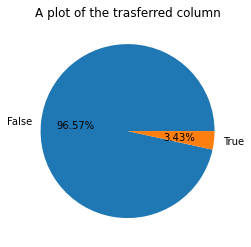

<Figure size 504x504 with 0 Axes>

In [27]:
my_labels = ['False', 'True']
plt.pie(holidays_df['transferred'].value_counts(), autopct = '%1.2f%%', labels = my_labels)
plt.title('A plot of the trasferred column')
plt.figure(figsize=(7,7))
plt.show()

# Oil Dataset

In [28]:
# import and view the oil dataset
oil_df = pd.read_csv('oil.csv')
oil_df.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [29]:
# checking for null values in the oil data set
oil_df.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [30]:
# calculate the mean value of the dcoilwtico column
oil_df['dcoilwtico'].mean()

67.71436595744689

In [31]:
# Replace all null values in the dcoilwtico column with the mean value
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].fillna(67.71)
oil_df

,date,dcoilwtico
0,2013-01-01,67.71
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [32]:
# print the maximum and the minimum values of the dcoilwtico_new column
max_val = oil_df['dcoilwtico'].max()
min_val = oil_df['dcoilwtico'].min()

print('The maxmimum dcoilwtico value is:' + str(max_val))
print('The minimum dcoilwtico value is:' + str(min_val))

The maxmimum dcoilwtico value is:110.62
The minimum dcoilwtico value is:26.19


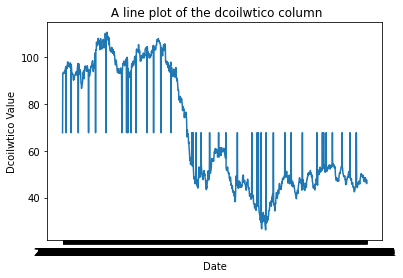

In [33]:
plt.plot(oil_df['date'], oil_df['dcoilwtico'])
plt.title(' A line plot of the dcoilwtico column')
plt.xlabel('Date')
plt.ylabel('Dcoilwtico Value')
plt.show()

In the latter years, the dcoilwtico values decreased.

# Stores dataset

In [34]:
# import and view the stores dataset
stores_df = pd.read_csv('stores.csv')
stores_df

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


# Transactions dataset

In [35]:
#import and view the transaction dataset
trans_df = pd.read_csv('transactions.csv')
trans_df

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [36]:
# Print the unique store numbers
trans_df['store_nbr'].unique()

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39,
       40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36, 53, 20, 29, 21,
       42, 22, 52], dtype=int64)

In [37]:
# print the highest transaction recorded
trans_df['transactions'].max()

8359

In [38]:
# Displaying the store number which had the highest transaction recorded
trans_df[trans_df['transactions'] >= 8359]

,date,store_nbr,transactions
52011,2015-12-23,44,8359


Store number 44 had the highest number of transaction on the 23rd of December, 2015

## Train Dataset

In [39]:
# import and view the train dataset
train_df = pd.read_csv('train.csv')
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [40]:
# view the first 10 rows of the train dataset
train_df.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [41]:
# check for null values in the dataset
train_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

There are null values in the train dataset

### Univaraite Analysis

### Store number

In [42]:
# check for unique store numbers
train_df['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

There are 54 unique store numbers

### Family

In [43]:
# print different families in the data set
train_df['family'].unique().tolist()

['AUTOMOTIVE',
 'BABY CARE',
 'BEAUTY',
 'BEVERAGES',
 'BOOKS',
 'BREAD/BAKERY',
 'CELEBRATION',
 'CLEANING',
 'DAIRY',
 'DELI',
 'EGGS',
 'FROZEN FOODS',
 'GROCERY I',
 'GROCERY II',
 'HARDWARE',
 'HOME AND KITCHEN I',
 'HOME AND KITCHEN II',
 'HOME APPLIANCES',
 'HOME CARE',
 'LADIESWEAR',
 'LAWN AND GARDEN',
 'LINGERIE',
 'LIQUOR,WINE,BEER',
 'MAGAZINES',
 'MEATS',
 'PERSONAL CARE',
 'PET SUPPLIES',
 'PLAYERS AND ELECTRONICS',
 'POULTRY',
 'PREPARED FOODS',
 'PRODUCE',
 'SCHOOL AND OFFICE SUPPLIES',
 'SEAFOOD']

In [44]:
# checking the value counts of each of the elements in the family
train_df['family'].value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

### Sales

In [45]:
# checking the maximum sales value in the data set
max_sales_value = train_df['sales'].max()
print('The Maximum sales value is: ' + str(max_sales_value))

The Maximum sales value is: 124717.0


In [46]:
# printing the store number that has the maximum sales value
train_df[train_df['sales'] == 124717.0]

,id,date,store_nbr,family,sales,onpromotion
2163723,2163723,2016-05-02,2,GROCERY I,124717.0,59


Store number 2 has the maximum sales value. It occurred on the 2nd of May, 2016. It sold Grocery I

In [47]:
# Mean store sales value
train_df['sales'].mean()

357.77574911262707

In [48]:
# checking the stores whose sales value are above the average
new_data = train_df[train_df['sales'] >= 357.78 ]
new_data

,id,date,store_nbr,family,sales,onpromotion
564,564,2013-01-01,25,BEVERAGES,810.000,0
573,573,2013-01-01,25,GROCERY I,700.000,0
1785,1785,2013-01-02,1,BEVERAGES,1091.000,0
1787,1787,2013-01-02,1,BREAD/BAKERY,470.652,0
1789,1789,2013-01-02,1,CLEANING,1060.000,0
...,...,...,...,...,...,...
3000873,3000873,2017-08-15,9,HOME CARE,373.000,6
3000879,3000879,2017-08-15,9,MEATS,449.228,0
3000880,3000880,2017-08-15,9,PERSONAL CARE,522.000,11
3000883,3000883,2017-08-15,9,POULTRY,438.133,0


In [49]:
# printing the number of stores whose sales value are above the average value
new_data.shape

(539971, 6)

More stores had the sales value below the average value 

### Onpromotion

In [50]:
# checking the highest promotion value
train_df['onpromotion'].max()

741

In [51]:
train_df[train_df['onpromotion'] == 741]

,id,date,store_nbr,family,sales,onpromotion
2216622,2216622,2016-05-31,53,GROCERY I,7517.0,741


 Store number 53 had the highest onpromotion value.

# Machine Learning Model

In [52]:
## converting all categorical data to numerical values using label encoder
l1 = LabelEncoder()
train_df['family'] = l1.fit_transform(train_df['family'])

l2 = LabelEncoder()
train_df['date'] = l2.fit_transform(train_df['date'])

In [53]:
# print information about the dataset 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         int32  
 2   store_nbr    int64  
 3   family       int32  
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int32(2), int64(3)
memory usage: 114.5 MB


In [54]:
# Dropping the Id column from the data set
new_train_df = train_df.drop('id', axis=1)
new_train_df

,date,store_nbr,family,sales,onpromotion
0,0,1,0,0.000,0
1,0,1,1,0.000,0
2,0,1,2,0.000,0
3,0,1,3,0.000,0
4,0,1,4,0.000,0
...,...,...,...,...,...
3000883,1683,9,28,438.133,0
3000884,1683,9,29,154.553,1
3000885,1683,9,30,2419.729,148
3000886,1683,9,31,121.000,8


In [55]:
# Print information about the new data set
new_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         int32  
 1   store_nbr    int64  
 2   family       int32  
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int32(2), int64(2)
memory usage: 91.6 MB


In [56]:
# Assign the feature and target to variables
X = new_train_df.drop('sales', axis=1)
y = new_train_df['sales']

In [57]:
# Divide the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

## Transform the data with MInMaxScaler

In [58]:
# Assign the MinMax scaler to a variable\
minmax_scaler = MinMaxScaler()

In [59]:
# scaled X_train
scaled_X_train = minmax_scaler.fit_transform(X_train)

In [60]:
# scaled X_test
scaled_X_test = minmax_scaler.transform(X_test)

## Linear Regression Model

In [61]:
# import Linear Regression Model
LR_model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=10000, positive=False)

In [62]:
# Fit features and targets into the model
LR_model.fit(scaled_X_train, y_train)

LinearRegression(n_jobs=10000)

In [63]:
# print score of the model
LR_model.score(scaled_X_train, y_train)

0.19302787100682683

In [64]:
# fit the test data into the model
LR_preds = LR_model.predict(scaled_X_test)

In [65]:
# Print the score of the model on the test dataset
print("The score of the mode on the test data is: {:.2f}".format(LR_model.score(scaled_X_test, y_test)))

The score of the mode on the test data is: 0.20


In [66]:
# print mean_squared_log_error
mean_squared_log_error(y_test, LR_preds)

13.593391464216456

In [67]:
# Print the slope of the model
print("LR_model.coef_: {}".format(LR_model.coef_))

LR_model.coef_: [-4.47037829e+00  1.41752484e+02 -3.51956292e+02  2.81973967e+04]


In [68]:
# Print the intercept of the model
print("LR_model.intercept_: {}".format(LR_model.intercept_))

LR_model.intercept_: 366.0768810748821


## Ridge Regression

In [69]:
# import Ridge Regression Model
ridge_model = Ridge(alpha=0.01, fit_intercept=True, copy_X=True, max_iter=50, tol=0.01, solver='auto', positive=False, random_state=0)

In [70]:
# Fit features and targets into the model
ridge_model.fit(scaled_X_train, y_train)

Ridge(alpha=0.01, max_iter=50, random_state=0, tol=0.01)

In [71]:
# predict the test dataset
ridge_preds = ridge_model.predict(scaled_X_test)

In [72]:
# Print the score of the model
print("The score of the ridge model is: {:.2f}".format(ridge_model.score(scaled_X_test, y_test)))

The score of the ridge model is: 0.20


In [73]:
# Print the log_mean_squared error of the model
mean_squared_log_error(y_test, ridge_preds)

13.59341722790302

In [74]:
X_train.shape

(2550754, 4)

## Decision Tree Classifier Model

In [75]:
# Assign Decision Tree Regressor to a variable
DTR_model = DecisionTreeRegressor(random_state=0, max_features=4, min_samples_leaf=12, min_weight_fraction_leaf=0.0000001,
                                 min_impurity_decrease=0.00001, ccp_alpha=0.000001)

In [76]:
# Fit the train data into the model
DTR_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=1e-06, max_features=4,
                      min_impurity_decrease=1e-05, min_samples_leaf=12,
                      min_weight_fraction_leaf=1e-07, random_state=0)

In [77]:
# Print score of the model
print("The score of the module is: {:.4f}".format(DTR_model.score(X_train, y_train)))

The score of the module is: 0.9135


In [78]:
# Predict the target values
DTR_preds = DTR_model.predict(X_test)

In [79]:
# Print the score of the model on the test dataset
print("The score of the mode on the test data is: {:.4f}".format(DTR_model.score(X_test, y_test)))

The score of the mode on the test data is: 0.8860


In [80]:
# print the mean Squared log error of the target and original values
mean_squared_log_error(y_test, DTR_preds)

0.29698402889672393

## Random Forest Regressor

In [81]:
# Assign Random Forest Regressor to a variable
RFR_model = RandomForestRegressor(n_estimators=150, criterion='squared_error', max_depth=50,
                                  min_samples_split=100, min_samples_leaf=10, min_weight_fraction_leaf=0.000001,
                                  max_features=4, max_leaf_nodes=10, min_impurity_decrease=1,
                                  bootstrap=True, oob_score=True, n_jobs=20, random_state=42,
                                  verbose=0, warm_start=False, ccp_alpha=1, max_samples=1000)

In [82]:
# Fit the train data into the model
RFR_model.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=1, max_depth=50, max_features=4,
                      max_leaf_nodes=10, max_samples=1000,
                      min_impurity_decrease=1, min_samples_leaf=10,
                      min_samples_split=100, min_weight_fraction_leaf=1e-06,
                      n_estimators=150, n_jobs=20, oob_score=True,
                      random_state=42)

In [83]:
# Print score of the model
print("The score of the model is:{:.4f}".format(RFR_model.score(X_train, y_train)))

The score of the model is:0.3734


In [84]:
# Predict the target values
RFR_preds = RFR_model.predict(X_test)

In [85]:
# Print the score of the model on the test dataset
print("The score of the mode on the test data is: {:.2f}".format(RFR_model.score(X_test, y_test)))

The score of the mode on the test data is: 0.37


In [86]:
# print the mean Squared log error of the target and original values
mean_squared_log_error(y_test, RFR_preds)

8.176511703972956

## K Nearest Neighbor Algorithm

In [87]:
# Assign K Nearest Neighbor to a variable
knn_model = KNeighborsRegressor(n_neighbors=4)

In [88]:
# fit the training data set into the model
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [89]:
# print the score of the train dataset
knn_model.score(X_train, y_train)

0.8412410202917565

In [90]:
# make predictions of the test dataset
knn_preds = knn_model.predict(X_test)

In [91]:
# Print score of the test dataset
print("The score of the test dataset is: {:.2f}".format(knn_model.score(X_test, y_test)))

The score of the test dataset is: 0.73


In [92]:
# print the mean Squared log error of the target and original values
mean_squared_log_error(y_test, knn_preds)

2.935562395158651

In [93]:
training_accuracy = []
test_accuracy = []
    
# try n_neighbors from 1 to 10
neighbors_settings = [1,2,3,4,5,6,7,8,9]
    
for n_neighbors in neighbors_settings:
   
    # build the model
    
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # record training set accuracy
training_accuracy.append(knn.score(X_train, y_train))

# record generalization accuracy
test_accuracy.append(knn.score(X_test, y_test))

In [94]:
# Print the training set accuracy
training_accuracy

[0.7515500065324486]

In [95]:
# Print the test set accuracy
test_accuracy

[0.676384496145473]

The best model is the Decision Tree Regressor Model

### Import the test data set

In [98]:
# Import and assign the test data set to a variable
test_df = pd.read_csv('test.csv')
test_df.head(10)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
5,3000893,2017-08-16,1,BREAD/BAKERY,12
6,3000894,2017-08-16,1,CELEBRATION,0
7,3000895,2017-08-16,1,CLEANING,25
8,3000896,2017-08-16,1,DAIRY,45
9,3000897,2017-08-16,1,DELI,18


In [99]:
# convert the family column to numerical
L3 = LabelEncoder()
test_df['family'] = L3.fit_transform(test_df['family'])

l4 = LabelEncoder()
test_df['date'] = l4.fit_transform(test_df['date'])

In [100]:
# Drop the Id column from the test data set
new_test_df = test_df.drop('id', axis=1)
new_test_df

,date,store_nbr,family,onpromotion
0,0,1,0,0
1,0,1,1,0
2,0,1,2,2
3,0,1,3,20
4,0,1,4,0
...,...,...,...,...
28507,15,9,28,1
28508,15,9,29,0
28509,15,9,30,1
28510,15,9,31,9


In [101]:
# Print information about the data set
new_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   date         28512 non-null  int32
 1   store_nbr    28512 non-null  int64
 2   family       28512 non-null  int32
 3   onpromotion  28512 non-null  int64
dtypes: int32(2), int64(2)
memory usage: 668.4 KB


In [114]:
# fit the data set into the Random Forest model
predictions = DTR_model.predict(new_test_df)

In [115]:
# convert the predictions into a Data Frame
predictions = pd.DataFrame(predictions)
predictions.head(10)

,0
0,2.088415
1,0.013264
2,4.209302
3,2218.100000
4,0.000000
5,654.166667
6,0.002083
7,894.615385
8,756.187500
9,130.533450


In [116]:
# import the sample submission file
samp_sub = pd.read_csv('sample_submission.csv')
samp_sub

,id,sales
0,3000888,57.597505
1,3000889,57.597505
2,3000890,947.154245
3,3000891,2347.789911
4,3000892,212.124434
...,...,...
28507,3029395,546.334375
28508,3029396,205.482803
28509,3029397,671.566228
28510,3029398,1479.723189


In [117]:
# Replace the sales column with the predictions column
samp_sub['sales'] = predictions

In [118]:
# View the samp_sub data set
samp_sub.head(10)

,id,sales
0,3000888,2.088415
1,3000889,0.013264
2,3000890,4.209302
3,3000891,2218.100000
4,3000892,0.000000
5,3000893,654.166667
6,3000894,0.002083
7,3000895,894.615385
8,3000896,756.187500
9,3000897,130.533450


In [119]:
# Saving the data into a csv file
samp_sub.to_csv('sample_submission.csv', index=False)

In [120]:
# load and view the sample submission data set
df = pd.read_csv('sample_submission.csv')
df.head(15)

,id,sales
0,3000888,2.088415
1,3000889,0.013264
2,3000890,4.209302
3,3000891,2218.100000
4,3000892,0.000000
5,3000893,654.166667
6,3000894,0.002083
7,3000895,894.615385
8,3000896,756.187500
9,3000897,130.533450
